In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_excel('premiums_rest.xlsx')   # Note: this notebook is copy of original , but dedicated
# to only for the data of population aged>25, which we call it as "rest" i.e records over age>25. 
#  and we run the same training and models for this rest data and see the improvements in model scores, 
# thus we select the Xgboost model as the best model for this rest data.

## Reading input sheet 

In [3]:
df.head(3)

,Age,Gender,Region,Marital_status,Number Of Dependants,BMI_Category,Smoking_Status,Employment_Status,Income_Level,Income_Lakhs,Medical History,Insurance_Plan,Annual_Premium_Amount
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,Silver,18164


##### Seeing the number of rows and columns

In [4]:
df.shape

(29904, 13)

In [5]:
df.columns

Index(['Age', 'Gender', 'Region', 'Marital_status', 'Number Of Dependants',
       'BMI_Category', 'Smoking_Status', 'Employment_Status', 'Income_Level',
       'Income_Lakhs', 'Medical History', 'Insurance_Plan',
       'Annual_Premium_Amount'],
      dtype='object')

# Bringing uniformity in column names

In [6]:
type(df.columns)

pandas.core.indexes.base.Index

In [7]:
#since the df columns are padas object , converting them in str , to apply str opperations
df.columns=df.columns.str.replace(" ","_").str.lower()

df.head(1)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053


# Handle Null Values if Any

seeing NA or NULL values in each column

In [8]:
df.isna().sum() #df.isnull().sum() will also result same

age                      0
gender                   0
region                   0
marital_status           0
number_of_dependants     0
bmi_category             0
smoking_status           9
employment_status        1
income_level             9
income_lakhs             0
medical_history          0
insurance_plan           0
annual_premium_amount    0
dtype: int64

In [9]:
#dropping all rows containing null values, as they are not many
#inplace=true >> modifies the same df
df.dropna(inplace=True)

In [10]:
df.isna().sum()  #checking df after dropping na

age                      0
gender                   0
region                   0
marital_status           0
number_of_dependants     0
bmi_category             0
smoking_status           0
employment_status        0
income_level             0
income_lakhs             0
medical_history          0
insurance_plan           0
annual_premium_amount    0
dtype: int64

# Drop Duplicates if any

In [11]:
df.duplicated().sum() #checks the number of duplicatte rows if aNY
df.drop_duplicates(inplace=True) #drops duplicates
df.duplicated().sum() #check again

np.int64(0)

In [12]:
df.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount
count,29886.000000,29886.000000,29886.000000,29886.000000
mean,43.396105,2.379910,23.364184,20892.303821
std,13.412657,1.431201,24.740339,6936.813440
min,26.000000,-3.000000,1.000000,3625.000000
25%,34.000000,1.000000,7.000000,15697.250000
50%,42.000000,3.000000,17.000000,20489.000000
75%,52.000000,3.000000,32.000000,26360.000000
max,356.000000,5.000000,930.000000,43471.000000


In [13]:
#checking the counts of negative numbers in nuber of dependents col

df[df.number_of_dependants<0].shape

(50, 13)

In [14]:
df[df.number_of_dependants<0]

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount
1805,34,Female,Southeast,Married,-1,Underweight,Regular,Self-Employed,25L - 40L,35,High blood pressure & Heart disease,Silver,22995
2273,41,Male,Southwest,Married,-1,Obesity,Regular,Salaried,10L - 25L,21,Diabetes,Silver,22766
3513,56,Male,Southwest,Married,-3,Normal,Occasional,Salaried,10L - 25L,16,Thyroid,Bronze,11979
3904,26,Male,Southeast,Married,-1,Obesity,Occasional,Freelancer,25L - 40L,27,No Disease,Silver,18269
4900,37,Male,Northwest,Married,-1,Overweight,Regular,Self-Employed,<10L,8,Diabetes,Bronze,13664
5917,42,Female,Southeast,Unmarried,-3,Overweight,Regular,Self-Employed,<10L,8,Diabetes & Heart disease,Bronze,17779
7095,50,Female,Northwest,Married,-3,Normal,Occasional,Salaried,<10L,4,Diabetes & High blood pressure,Silver,21957
7222,47,Male,Northwest,Unmarried,-3,Overweight,Occasional,Self-Employed,10L - 25L,19,No Disease,Gold,27457
7551,39,Male,Southwest,Unmarried,-1,Overweight,Occasional,Self-Employed,25L - 40L,40,High blood pressure,Silver,18406
9047,47,Male,Northwest,Married,-1,Overweight,Occasional,Self-Employed,25L - 40L,27,High blood pressure,Gold,29812


In [15]:
#what age values they contain ,
type(df[df.number_of_dependants<0])

df[df.number_of_dependants<0]["number_of_dependants"]

1805    -1
2273    -1
3513    -3
3904    -1
4900    -1
5917    -3
7095    -3
7222    -3
7551    -1
9047    -1
9200    -1
9858    -3
10035   -1
10080   -1
13092   -1
13218   -1
13364   -3
13714   -3
14286   -3
15484   -3
15842   -3
16262   -3
16490   -3
17634   -3
18640   -1
18932   -1
19073   -3
19159   -1
19609   -3
20453   -1
20737   -1
21093   -3
21361   -3
23561   -3
24606   -1
25369   -1
26025   -1
26229   -1
27114   -1
27355   -1
27630   -3
27890   -1
27942   -1
28023   -3
28197   -1
28501   -1
28779   -1
29484   -1
29491   -1
29639   -1
Name: number_of_dependants, dtype: int64

In [16]:
df[df.number_of_dependants<0]["number_of_dependants"].unique()

#so, -3 and -1 are the number of dep values in about 72 rows, we can turn all them to positives 
#thinking that those were +3 and +1, but mistakenly given in negatives 

array([-1, -3])

In [17]:
df.number_of_dependants=df.number_of_dependants.abs() # Converting neagtive ages to positive ages

In [18]:
df.number_of_dependants.unique()

array([0, 2, 3, 4, 1, 5])

# Plotting Box plot to view outliers for all numeric columns

In [19]:
# if df has too many numeric columns , we can use below line to get all columns having numeric or float values

numeric_columns=df.select_dtypes(["int64","float64"]).columns

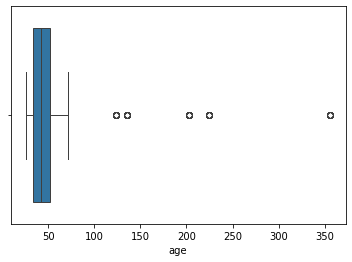

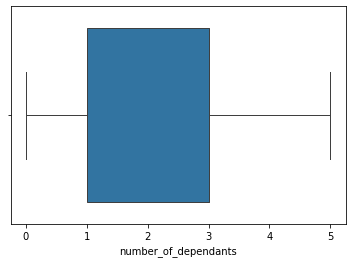

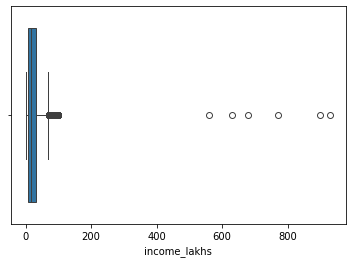

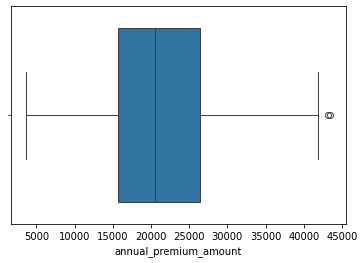

In [20]:
for col in numeric_columns:
    sns.boxplot(x=df[col])
    plt.show()

In [21]:
#treating Age column  by removing ages beyond 100

In [22]:
df1=df[df.age<100]

In [23]:
df1.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount
count,29828.000000,29828.000000,29828.000000,29828.000000
mean,43.095380,2.387790,23.371530,20901.900563
std,11.041991,1.420641,24.751262,6928.457636
min,26.000000,0.000000,1.000000,6538.000000
25%,34.000000,1.000000,7.000000,15706.000000
50%,42.000000,3.000000,17.000000,20496.000000
75%,52.000000,3.000000,32.000000,26361.000000
max,72.000000,5.000000,930.000000,43471.000000


# Outlier removal in income column using IQR method

In [24]:
q1=df1.income_lakhs.quantile(0.25)
q1

q2=df1.income_lakhs.quantile(0.75)
q2


np.float64(32.0)

In [25]:
IQR=q2-q1
IQR

np.float64(25.0)

In [26]:
#this cab be done or we can simply use other quantile straightly and drop the ones which are not within that quantile
# df2=df1[(df1.income_lakhs>q1-1.5*IQR) & (df1.income_lakhs<q2+IQR)]

max_limit=df1.income_lakhs.quantile(.999)  #its gives 100 lackhs as the quantile limit/ .999 is jsut an experimented one, to get 
#100 lakhs as the sensible limit in income , you can change the number to experiment./ so , we will limit the income to max 100

In [27]:
df2=df1[df1.income_lakhs<=max_limit]

In [28]:
df2.income_lakhs.describe()

count    29822.000000
mean        23.226343
std         22.455408
min          1.000000
25%          7.000000
50%         17.000000
75%         32.000000
max        100.000000
Name: income_lakhs, dtype: float64

# Plotting Histogram now to know the distribution pattern of the data

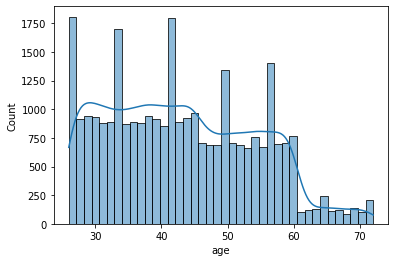

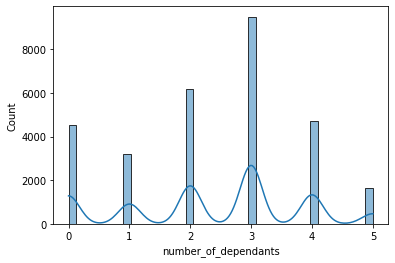

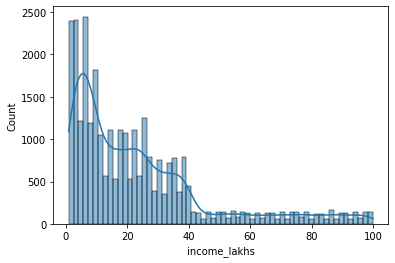

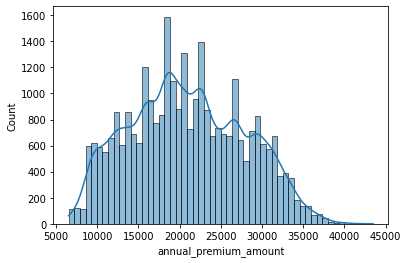

In [29]:
for col in numeric_columns:
    sns.histplot(df2[col] , kde=True)
    plt.show()
    

In [30]:
#Above histograms show the Univariate analaysis, i.e only one variable is seen visually, but there can be more than one variable
#creating a plot , which is called BiVariate analsysis, for which we can use scatterplot//

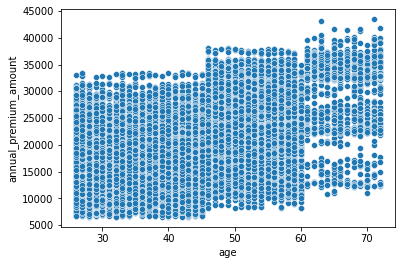

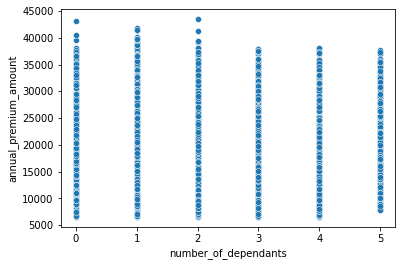

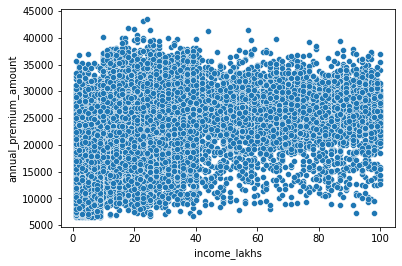

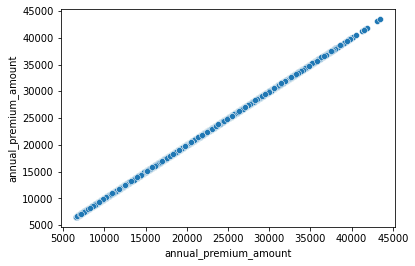

In [31]:
for col in numeric_columns:
    sns.scatterplot(df2,x=df2[col],y='annual_premium_amount')
    plt.show()

In [32]:
# there isnt much in above pictures, so we move our EDA into non numerical columns/


In [33]:
df2.dtypes

age                       int64
gender                   object
region                   object
marital_status           object
number_of_dependants      int64
bmi_category             object
smoking_status           object
employment_status        object
income_level             object
income_lakhs              int64
medical_history          object
insurance_plan           object
annual_premium_amount     int64
dtype: object

In [34]:
#Correcting the non uniformity in values of column

df2['smoking_status'].replace(
    {
        'Smoking=0':'No Smoking',
        'Does Not Smoke':'No Smoking',
        'Not Smoking':'No Smoking'
    }
    , inplace=True
)

df2['smoking_status'].unique()

C:\Users\kulka\AppData\Local\Temp\ipykernel_6596\1222788578.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['smoking_status'].replace(
C:\Users\kulka\AppData\Local\Temp\ipykernel_6596\1222788578.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['smoking_status'].replace(


array(['No Smoking', 'Regular', 'Occasional'], dtype=object)

In [35]:
#in above list selecting only object

df3=df2.select_dtypes(['object'])

In [36]:
#kKnwoing count or percentage of male and female in gender

df3.gender.value_counts()

gender
Male      16376
Female    13446
Name: count, dtype: int64

In [37]:
# if we need in percentages then

gender_count_percentage=df3.gender.value_counts(normalize=True)

# bar plotting

In [38]:
ind=gender_count_percentage.index

In [39]:
val=gender_count_percentage.values

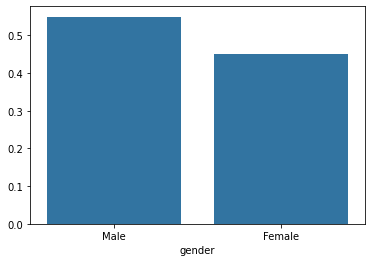

In [40]:
sns.barplot(x=ind,y=val)
plt.show()

In [41]:
# Crosstab plotting for bivariate analysus , like seeing which insurance plan is bought by which incomelevel people
# i.e plotting bar chart FOR MULITVARIATE ANALYSIS  

crosstab_details=pd.crosstab(df2['income_level'],df2['insurance_plan'])
print(crosstab_details)

insurance_plan  Bronze  Gold  Silver
income_level                        
10L - 25L          799  3554    4354
25L - 40L          301  2631    3142
<10L              6054   527    4341
> 40L              214  3287     618


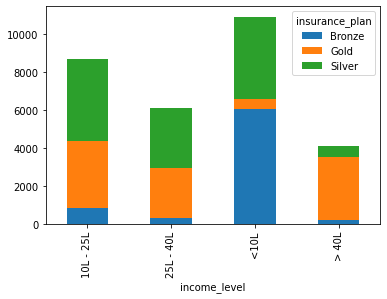

In [42]:
#in above crosstab table, we see the GOld plan is most bought by20-35 income peoplel

# To have such visualization , we plot the bar chart with crosstab 

crosstab_details.plot(kind='bar',stacked=True)  #,stacked=True puts all sections in one bar , making it look like a multicaolor bar
plt.show()

# Heatmap

<Axes: xlabel='insurance_plan', ylabel='income_level'>

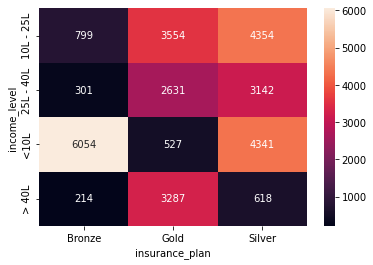

In [43]:
sns.heatmap(crosstab_details,annot=True,fmt='d')

## Feature Engineering

In [44]:
#Now we address the columns whos values are in text forms

In [45]:
df2.medical_history.unique()

array(['Diabetes', 'High blood pressure', 'No Disease',
       'Diabetes & High blood pressure', 'Thyroid', 'Heart disease',
       'High blood pressure & Heart disease', 'Diabetes & Thyroid',
       'Diabetes & Heart disease'], dtype=object)

In [46]:
#list of diseases and its risk scores given by business company for our use
risk_scores={
    "diabetes":6,"heart disease":8,"high blood pressure":6,"thyroid":5,"no disease":0,"none":0
}

In [47]:
df2[['disease1','disease2']]=df2['medical_history'].str.split(" & ", expand=True).apply(lambda x:x.str.lower()).copy()

# We have to assign the scores or numbers to each of disease, as ML model only understands numbers and not text.
#Some medical history have more than one disease combined with & , so we split it using str.split(" & ")
#df3['medical_history'].str.split(" & ") >> gives a Series which we dont want
# SO expand= True makes it a dataframe.

#.apply(lambda x:x.str.lower()) >> makes all values to lower case

#df3[['disease1','disease2']]  on equating to this, this will give out two columns as disease1 and disease2 in our df3

C:\Users\kulka\AppData\Local\Temp\ipykernel_6596\1471267251.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[['disease1','disease2']]=df2['medical_history'].str.split(" & ", expand=True).apply(lambda x:x.str.lower()).copy()
C:\Users\kulka\AppData\Local\Temp\ipykernel_6596\1471267251.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[['disease1','disease2']]=df2['medical_history'].str.split(" & ", expand=True).apply(lambda x:x.str.lower()).copy()


In [48]:
df2.sample(5)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,disease1,disease2
5050,60,Female,Southeast,Married,2,Normal,No Smoking,Self-Employed,<10L,3,Diabetes,Silver,18355,diabetes,None
12588,38,Male,Southeast,Married,4,Overweight,Occasional,Self-Employed,<10L,6,Diabetes & High blood pressure,Bronze,14347,diabetes,high blood pressure
913,68,Female,Northwest,Married,1,Overweight,No Smoking,Self-Employed,<10L,1,Diabetes & High blood pressure,Silver,26446,diabetes,high blood pressure
29294,45,Male,Southeast,Unmarried,2,Normal,No Smoking,Salaried,<10L,8,Diabetes,Gold,22370,diabetes,None
1579,32,Male,Southeast,Married,3,Overweight,Regular,Self-Employed,25L - 40L,34,Thyroid,Silver,20800,thyroid,None


In [49]:
#removing any NA values

df2['disease1'].fillna('none',inplace=True)
df2['disease2'].fillna('none',inplace=True)

df2['disease1']=df2['disease1'].map(risk_scores)
df2['disease2']=df2['disease2'].map(risk_scores)
df2['total_risk_score']=df2['disease1']+df2['disease2']

C:\Users\kulka\AppData\Local\Temp\ipykernel_6596\1299370983.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['disease1'].fillna('none',inplace=True)
C:\Users\kulka\AppData\Local\Temp\ipykernel_6596\1299370983.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['disease1'].fillna('none',inplace=True)
C:\Users\kulka\AppData\Local\Temp

In [50]:
df3.sample(5)

,gender,region,marital_status,bmi_category,smoking_status,employment_status,income_level,medical_history,insurance_plan
19,Female,Southeast,Unmarried,Obesity,No Smoking,Salaried,10L - 25L,High blood pressure,Silver
2144,Female,Northeast,Unmarried,Normal,No Smoking,Salaried,<10L,High blood pressure,Silver
23919,Female,Southeast,Married,Obesity,No Smoking,Salaried,10L - 25L,Diabetes,Silver
532,Female,Northwest,Married,Obesity,No Smoking,Self-Employed,10L - 25L,High blood pressure,Silver
13705,Female,Southwest,Married,Obesity,Regular,Freelancer,> 40L,High blood pressure,Gold


In [51]:
# SO, NOW MEDICAL HISTORY IS MADE in NUmeric INFO

In [52]:
# NOw normalize the totalscore , i.e getting number bettwen 0 and 1 scale
#i.e scaling all numbers between 0 to 1 range

max=df2.total_risk_score.max()
min=df2.total_risk_score.min()

df2['normalized_score']=(df2.total_risk_score - min) / (max-min)

C:\Users\kulka\AppData\Local\Temp\ipykernel_6596\1509577109.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['normalized_score']=(df2.total_risk_score - min) / (max-min)


In [53]:
df2.sample(4)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,disease1,disease2,total_risk_score,normalized_score
27387,49,Female,Southeast,Married,2,Normal,Occasional,Self-Employed,<10L,8,Heart disease,Silver,23959,8,0,8,0.571429
23711,26,Male,Southwest,Married,3,Obesity,Regular,Salaried,<10L,7,High blood pressure,Silver,22841,6,0,6,0.428571
22720,42,Female,Southwest,Unmarried,0,Underweight,No Smoking,Self-Employed,25L - 40L,33,High blood pressure,Silver,16535,6,0,6,0.428571
17151,53,Male,Southeast,Married,3,Normal,Regular,Self-Employed,> 40L,46,Thyroid,Bronze,13687,5,0,5,0.357143


In [54]:
df2.insurance_plan.unique()

array(['Bronze', 'Silver', 'Gold'], dtype=object)

In [55]:
#now handling this insurance plan col
df2['insurance_plan']=df2['insurance_plan'].map({"Bronze":1,"Silver":2,"Gold":3})
df2.sample(3)

C:\Users\kulka\AppData\Local\Temp\ipykernel_6596\909566133.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['insurance_plan']=df2['insurance_plan'].map({"Bronze":1,"Silver":2,"Gold":3})


,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,disease1,disease2,total_risk_score,normalized_score
16059,54,Male,Southeast,Married,3,Overweight,Occasional,Salaried,25L - 40L,38,Heart disease,3,33370,8,0,8,0.571429
7024,42,Male,Southwest,Married,2,Normal,No Smoking,Salaried,<10L,7,High blood pressure,2,15982,6,0,6,0.428571
6154,45,Male,Southwest,Married,3,Normal,Regular,Self-Employed,> 40L,74,No Disease,3,22961,0,0,0,0.000000


In [56]:
df2=df2.drop(["total_risk_score",'disease1','disease2','medical_history'],axis="columns")

In [57]:
df2.head(2)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,insurance_plan,annual_premium_amount,normalized_score
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,1,9053,0.428571
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,1,16339,0.428571


In [58]:
# handling income level col into pure numbers

levels=df2.income_level.unique()
levels

array(['<10L', '10L - 25L', '> 40L', '25L - 40L'], dtype=object)

In [59]:
# handling income level col into pure numbers

df2['income_level']=df2.income_level.map({'<10L':1,'10L - 25L':2,'25L - 40L':3, '> 40L':4})

df2.sample(3)

In [60]:
#now addressing the cols which have nominal data , ie data which are not of any order or ranks like we had for 
#bronze , silver, gold... etc

nominal_cols=df2.select_dtypes('object').columns
nominal_cols

Index(['gender', 'region', 'marital_status', 'bmi_category', 'smoking_status',
       'employment_status'],
      dtype='object')

In [61]:
# So using one hot encoding for these nominal cols

df2=pd.get_dummies(df2,columns=nominal_cols,drop_first=True,dtype=int) #drop_first=True>> is very IMP, else in VIF scores we
#might end up seeing infinity as value to many columns . 
# this drop_first=True , drops the redundant dummy of the col, ex: for Gender col, there are two dummies (gender_male,gender_female)
# if gender_male is '1' , then it certainly means that i dont need info from gender_female, or vice versa, as keeping both 
# is simply redundant. And if this redundancy is not removed, we get 'inf' value when we calculate VIF score

#below two lines removes the wrapping of the output table
pd.set_option('display.max_columns', None) 
pd.set_option('display.width', None)
df2.head()

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,annual_premium_amount,normalized_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,26,0,1,6,1,9053,0.428571,1,1,0,0,1,0,0,0,0,0,1,0
1,29,2,1,6,1,16339,0.428571,0,0,1,0,0,1,0,0,0,1,1,0
2,49,2,2,20,2,18164,0.428571,0,0,0,0,0,0,0,0,0,0,0,1
3,30,3,4,77,3,20303,0.000000,0,0,1,0,0,0,0,0,0,0,1,0
4,56,3,2,14,1,15610,0.428571,1,0,0,0,0,1,0,0,1,0,0,1


In [62]:
#Since all of the columns now have a numeric data which model can understand, now we try to find the coorelation
#factor between the columns, to select the appropriate cols for model training, bcos not all cols contribute meanifully to
#determine the annual premium price....

# Coorelation matrix

In [63]:
cm=df2.corr()

In [64]:
cm

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,annual_premium_amount,normalized_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
age,1.000000,-0.017614,0.033455,0.024253,0.310446,0.484715,0.002473,-0.003699,0.001752,-0.002130,-0.003622,-0.123857,0.014732,0.017585,0.005224,-0.053572,-0.126481,-0.198537,0.270621
number_of_dependants,-0.017614,1.000000,-0.000009,-0.000640,0.010334,0.015969,0.106168,-0.000594,-0.002981,0.000732,0.007047,-0.777352,0.019413,0.014560,-0.021186,0.011848,0.013306,0.012497,-0.015319
income_level,0.033455,-0.000009,1.000000,0.906027,0.575543,0.457965,0.009162,0.087234,-0.003207,0.001624,0.008060,-0.008038,-0.013072,0.000403,0.009439,-0.008517,0.027486,-0.153555,0.158281
income_lakhs,0.024253,-0.000640,0.906027,1.000000,0.491785,0.385215,0.002320,0.064060,-0.004417,0.000914,0.006266,-0.005109,-0.010316,0.001635,0.004484,-0.002957,0.018637,-0.115155,0.121798
insurance_plan,0.310446,0.010334,0.575543,0.491785,1.000000,0.882571,0.001329,0.069102,-0.000996,0.006580,-0.006797,-0.053047,0.014033,0.025969,-0.014648,-0.029196,-0.017796,-0.152740,0.185159
annual_premium_amount,0.484715,0.015969,0.457965,0.385215,0.882571,1.000000,0.209361,0.132898,-0.004529,0.007190,-0.005766,-0.103286,0.188450,0.086748,-0.053967,-0.059392,0.136671,-0.179511,0.226210
normalized_score,0.002473,0.106168,0.009162,0.002320,0.001329,0.209361,1.000000,-0.005953,-0.010381,0.002480,0.005633,-0.140899,-0.010069,-0.004903,0.006440,0.005484,0.003338,-0.009321,0.014835
gender_Male,-0.003699,-0.000594,0.087234,0.064060,0.069102,0.132898,-0.005953,1.000000,-0.003620,-0.004893,0.004782,0.001761,-0.020570,0.103029,-0.029880,-0.096120,0.372381,0.004947,0.002606
region_Northwest,0.001752,-0.002981,-0.003207,-0.004417,-0.000996,-0.004529,-0.010381,-0.003620,1.000000,-0.369870,-0.329590,0.001498,0.001041,0.000390,-0.007454,-0.000612,0.001156,0.000872,0.000298
region_Southeast,-0.002130,0.000732,0.001624,0.000914,0.006580,0.007190,0.002480,-0.004893,-0.369870,1.000000,-0.485524,-0.000902,0.005947,-0.002976,0.001146,-0.001300,-0.001107,-0.009254,0.002759


<function matplotlib.pyplot.show(close=None, block=None)>

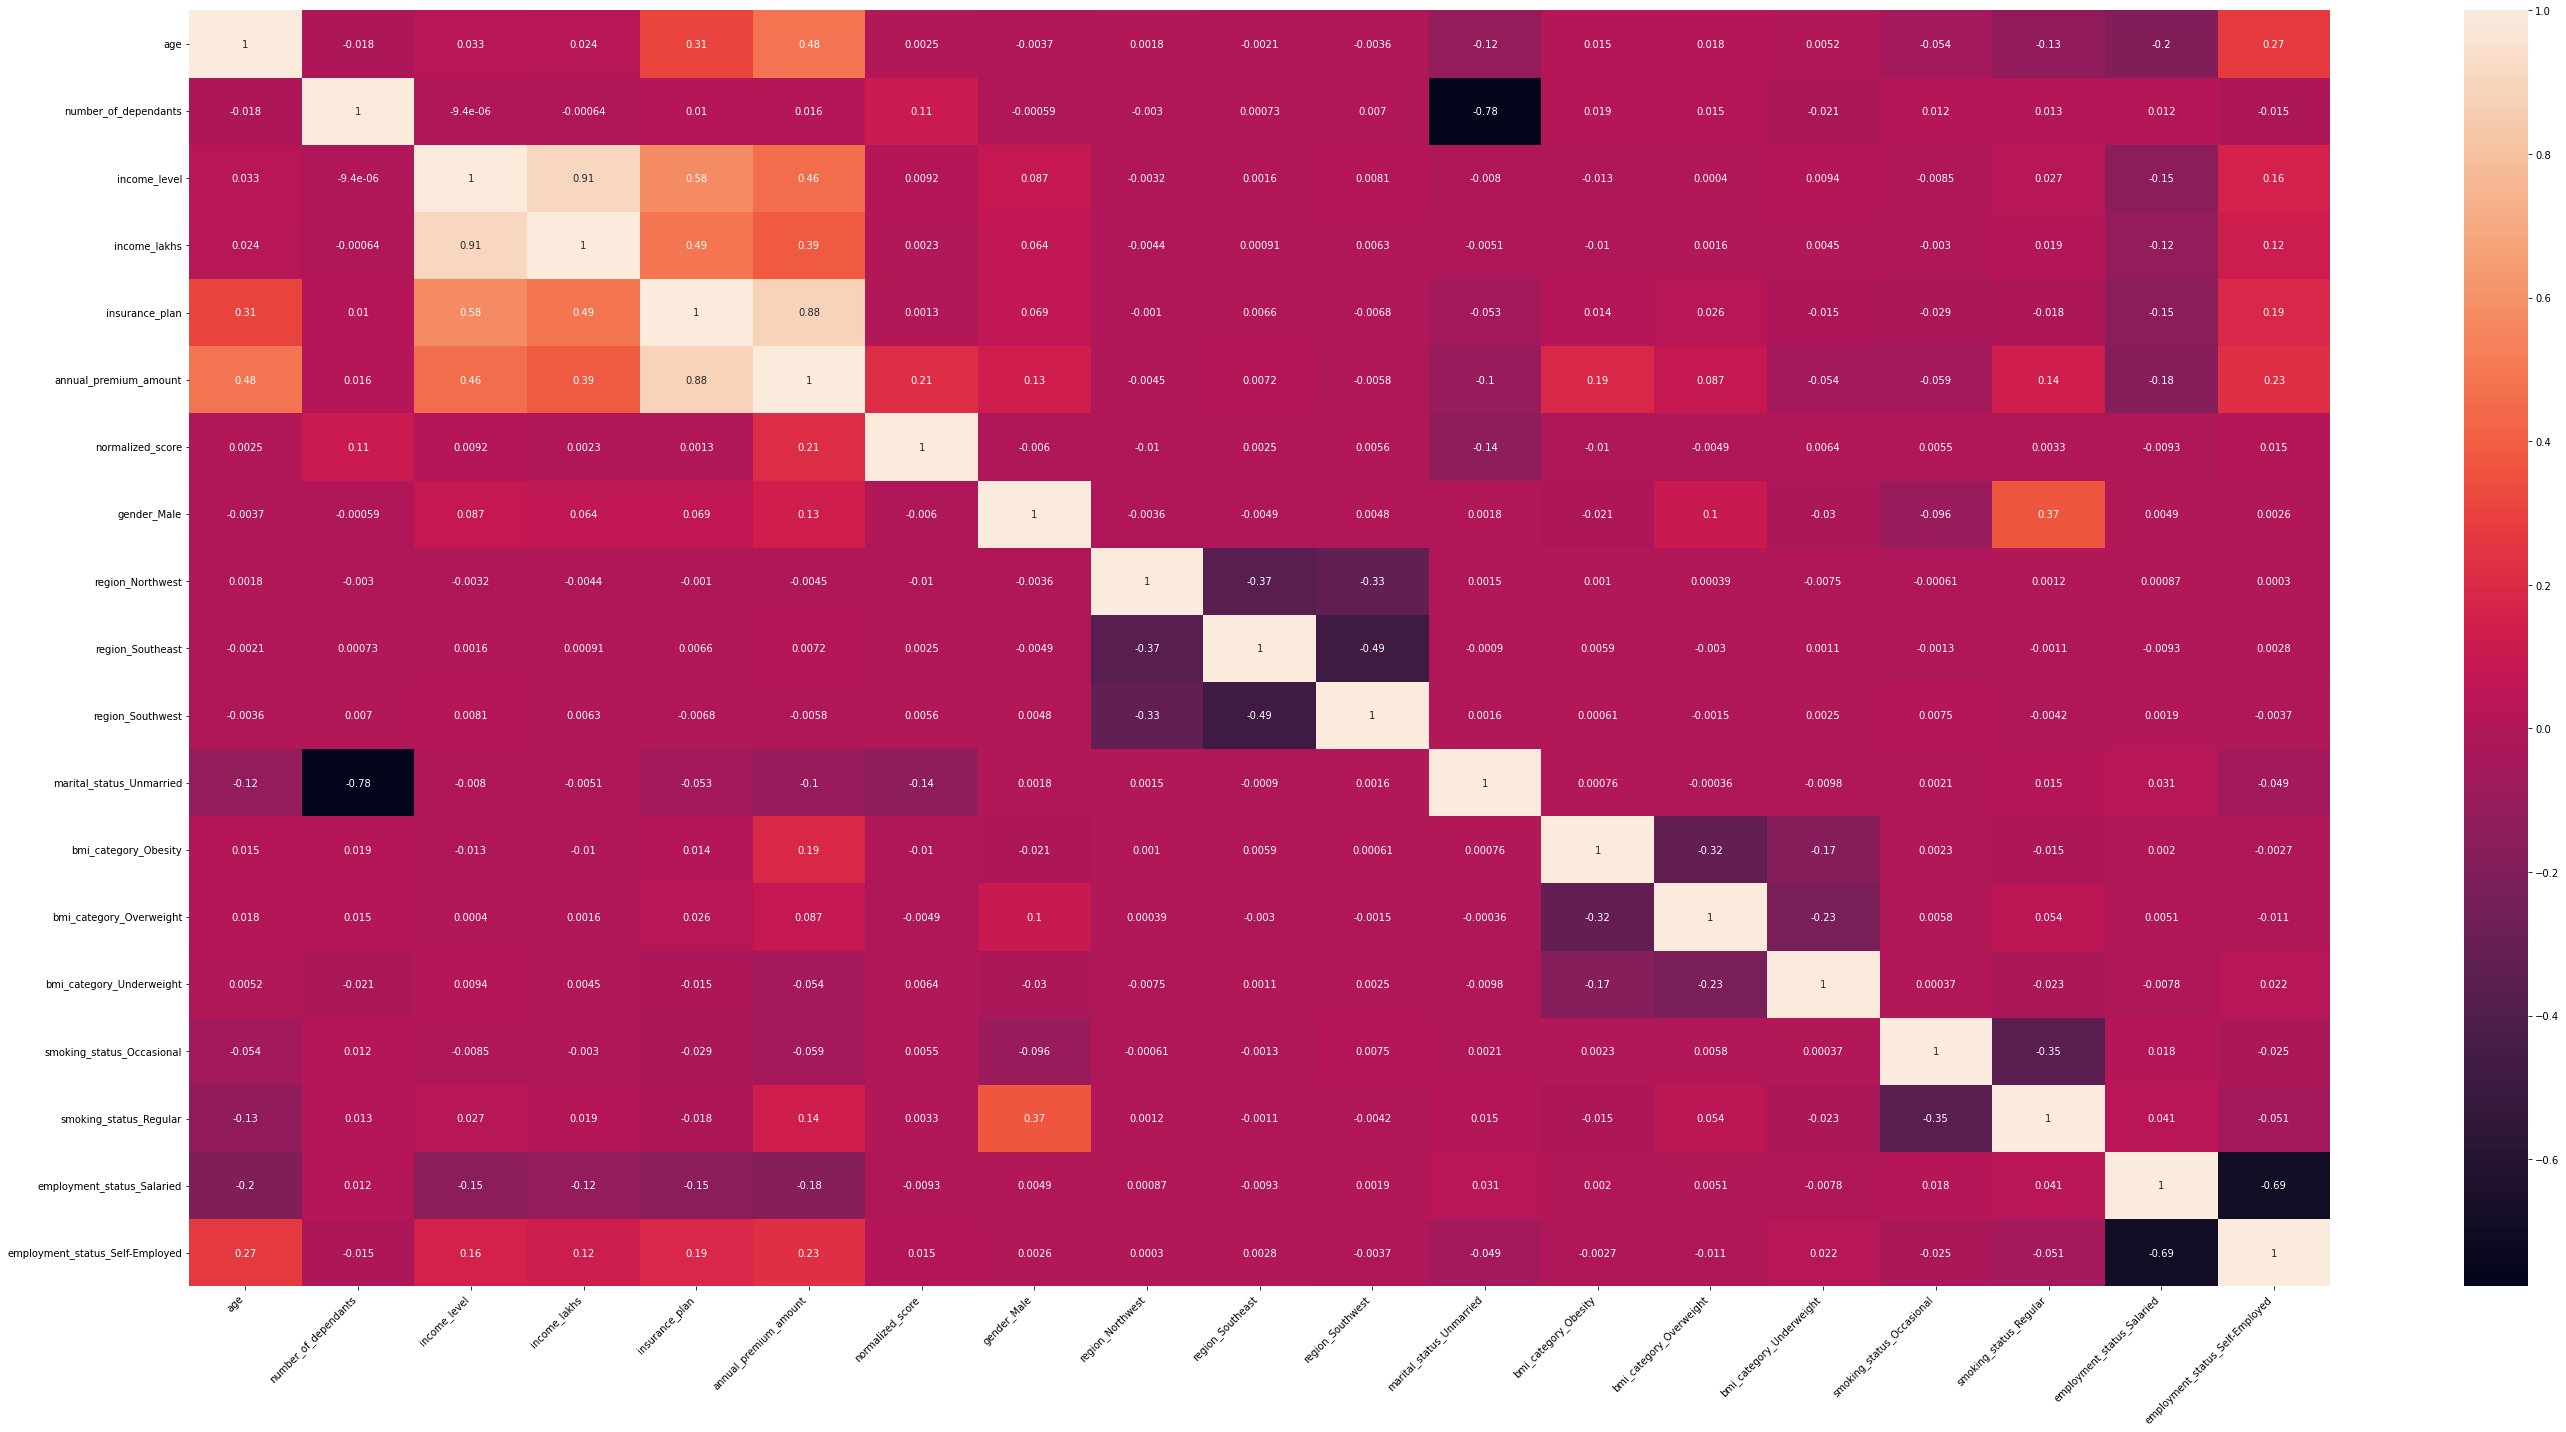

In [65]:
# Need to plot the above usnig heatmap for visualization.

plt.figure(figsize=(40,20))
sns.heatmap(cm,annot=True)
plt.xticks(rotation=45,ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

plt.show



In [66]:
df2.columns

Index(['age', 'number_of_dependants', 'income_level', 'income_lakhs',
       'insurance_plan', 'annual_premium_amount', 'normalized_score',
       'gender_Male', 'region_Northwest', 'region_Southeast',
       'region_Southwest', 'marital_status_Unmarried', 'bmi_category_Obesity',
       'bmi_category_Overweight', 'bmi_category_Underweight',
       'smoking_status_Occasional', 'smoking_status_Regular',
       'employment_status_Salaried', 'employment_status_Self-Employed'],
      dtype='object')

# Separating the target column and training columns 

In [67]:
#target column
y=df2['annual_premium_amount']

#training columns without the target column
X=df2.drop('annual_premium_amount',axis='columns')

In [68]:
X.head()

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,normalized_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,26,0,1,6,1,0.428571,1,1,0,0,1,0,0,0,0,0,1,0
1,29,2,1,6,1,0.428571,0,0,1,0,0,1,0,0,0,1,1,0
2,49,2,2,20,2,0.428571,0,0,0,0,0,0,0,0,0,0,0,1
3,30,3,4,77,3,0.000000,0,0,1,0,0,0,0,0,0,0,1,0
4,56,3,2,14,1,0.428571,1,0,0,0,0,1,0,0,1,0,0,1


In [69]:
y

0         9053
1        16339
2        18164
3        20303
4        15610
         ...  
29899    26370
29900    29496
29901    10957
29902    27076
29903    19730
Name: annual_premium_amount, Length: 29822, dtype: int64

In [70]:
X.describe()

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,normalized_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
count,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000
mean,43.094896,2.387734,2.113674,23.226343,2.088223,0.426373,0.549125,0.200691,0.352693,0.301992,0.253336,0.196835,0.295051,0.110087,0.173228,0.374656,0.466132,0.354269
std,11.042430,1.420644,1.053332,22.455408,0.758018,0.240084,0.497589,0.400524,0.477816,0.459129,0.434929,0.397613,0.456073,0.313003,0.378450,0.484042,0.498860,0.478299
min,26.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,34.000000,1.000000,1.000000,7.000000,2.000000,0.357143,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,42.000000,3.000000,2.000000,17.000000,2.000000,0.428571,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,52.000000,3.000000,3.000000,32.000000,3.000000,0.428571,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,72.000000,5.000000,4.000000,100.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [71]:
#if you see the table , in max row.. some values are still not scaled between o and 1,  ex: age , income_lakhs col is 100 lakhs , so its better
#to scale all numeric cols between 0 and 1 , hence using MinMaxScalar.

from sklearn.preprocessing import MinMaxScaler
cols_to_scale=['age','number_of_dependants','income_level','income_lakhs','insurance_plan']
#all these cols i wish to scale their values between 0 to 1

#creating object of MinMaxScaler
scaler=MinMaxScaler()

X[cols_to_scale]=scaler.fit_transform(X[cols_to_scale])
X.describe()

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,normalized_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
count,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000
mean,0.371628,0.477547,0.371225,0.224509,0.544112,0.426373,0.549125,0.200691,0.352693,0.301992,0.253336,0.196835,0.295051,0.110087,0.173228,0.374656,0.466132,0.354269
std,0.240053,0.284129,0.351111,0.226822,0.379009,0.240084,0.497589,0.400524,0.477816,0.459129,0.434929,0.397613,0.456073,0.313003,0.378450,0.484042,0.498860,0.478299
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.173913,0.200000,0.000000,0.060606,0.500000,0.357143,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.347826,0.600000,0.333333,0.161616,0.500000,0.428571,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.565217,0.600000,0.666667,0.313131,1.000000,0.428571,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [72]:
#at this stage we broght down all the values in all the cols to lie between 0 and 1

#now see, if there is any multicollinearity between cols, ie. cols which perhaps giving the same info as other cols, 
#we need to remove them, so that we dont take any redundant col for model training.

# that is done by knwoing the VIF(Variance Inflation Factor) score of each col, that needs to be less than 5.. anything more than 5, it indicates the col is 
#having the same meaning as of other, so out of those two , once col can be removed from dataset.

from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(data):
    vif_df=pd.DataFrame()
    vif_df['Column']=data.columns
    vif_df['VIF'] =[variance_inflation_factor(data.values,i) for i in range(data.shape[1])]
    return vif_df
calculate_vif(X)

,Column,VIF
0,age,3.921783
1,number_of_dependants,6.278938
2,income_level,13.890522
3,income_lakhs,11.185596
4,insurance_plan,5.271297
5,normalized_score,3.810619
6,gender_Male,2.599098
7,region_Northwest,2.123965
8,region_Southeast,2.980842
9,region_Southwest,2.710097


In [73]:
calculate_vif(X)

,Column,VIF
0,age,3.921783
1,number_of_dependants,6.278938
2,income_level,13.890522
3,income_lakhs,11.185596
4,insurance_plan,5.271297
5,normalized_score,3.810619
6,gender_Male,2.599098
7,region_Northwest,2.123965
8,region_Southeast,2.980842
9,region_Southwest,2.710097


In [74]:
#in above we, see >> income_level	12.450675
# 	income_lakhs	11.183367

# Both are greater than 5 , and which shows both of them are highly corelated and provide same information, hence
#  anyone can be removed as it being redundant, but better remove the one which has highest VIF.

#anytime the VIF is > than '10' we simply delete that column .

X_reduced=X.drop('income_level',axis='columns')

# recheck the VIF after dropping 
calculate_vif(X_reduced)


,Column,VIF
0,age,3.863055
1,number_of_dependants,6.278147
2,income_lakhs,2.678102
3,insurance_plan,4.574625
4,normalized_score,3.808345
5,gender_Male,2.591439
6,region_Northwest,2.123277
7,region_Southeast,2.979899
8,region_Southwest,2.708641
9,marital_status_Unmarried,2.345757


In [75]:
# Now we Jump to Model training using rhis X_reduced and y

# Model Training

In [76]:
from sklearn.model_selection import train_test_split
help(train_test_split)

Help on function train_test_split in module sklearn.model_selection._split:

train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)
    Split arrays or matrices into random train and test subsets.
    
    Quick utility that wraps input validation,
    ``next(ShuffleSplit().split(X, y))``, and application to input data
    into a single call for splitting (and optionally subsampling) data into a
    one-liner.
    
    Read more in the :ref:`User Guide <cross_validation>`.
    
    Parameters
    ----------
    *arrays : sequence of indexables with same length / shape[0]
        Allowed inputs are lists, numpy arrays, scipy-sparse
        matrices or pandas dataframes.
    
    test_size : float or int, default=None
        If float, should be between 0.0 and 1.0 and represent the proportion
        of the dataset to include in the test split. If int, represents the
        absolute number of test samples. If None, the value is set to

In [77]:
X_train,X_test,y_train,y_test=train_test_split(X_reduced,y,test_size=0.3,random_state=42)

In [78]:
from sklearn.linear_model import LinearRegression

# defining a Liner Regression model
model_lr=LinearRegression()
#training that model with X_train and y_train
model_lr.fit(X_train,y_train)

#now testing the trained model 
test_score=model_lr.score(X_test,y_test)

#just checking what will be the score if model is made to predict on trained data only
train_score=model_lr.score(X_train,y_train)

train_score, test_score

(0.9530815646744318, 0.9546117251336063)

In [79]:
#here both scores are same, 0.928 , IE,92.8 PERCENT ACCURACT THE MODEL IS
# ,  if model is overfitting, train_Score will be higher than test_Score

In [80]:
# TO KNOW THE COEFFICIENTS AND INTERCEPT OF THE MODEL
model_lr.coef_

array([ 7014.39496675, -1247.79337884,  -748.5047392 , 14840.07632438,
        6029.14742861,    42.76580366,   -76.16565671,   -25.08331687,
         -53.33779201,  -702.17193058,  3930.46262822,  1999.07429281,
         598.45525871,   855.18031748,  2816.79153464,   -73.4601338 ,
         248.75420828])

In [81]:
model_lr.intercept_

np.float64(5923.857616247909)

In [82]:
# coefficint with feature names
coefs=model_lr.coef_
for feature, coef in zip(X_train.columns, coefs):
    print(feature, "→", coef)

age → 7014.394966747988
number_of_dependants → -1247.793378838558
income_lakhs → -748.5047391968875
insurance_plan → 14840.076324382831
normalized_score → 6029.147428614283
gender_Male → 42.76580365769882
region_Northwest → -76.16565670640652
region_Southeast → -25.083316869454542
region_Southwest → -53.33779200953602
marital_status_Unmarried → -702.1719305767862
bmi_category_Obesity → 3930.4626282170743
bmi_category_Overweight → 1999.0742928087939
bmi_category_Underweight → 598.4552587109046
smoking_status_Occasional → 855.1803174768155
smoking_status_Regular → 2816.791534637665
employment_status_Salaried → -73.46013379532178
employment_status_Self-Employed → 248.75420827705244


In [83]:
# lets plot a bar chart of these by creating a dataframe

coef_df=pd.DataFrame(model_lr.coef_ , index=X_test.columns, columns=['Coefficients'])

In [84]:
coef_df

,Coefficients
age,7014.394967
number_of_dependants,-1247.793379
income_lakhs,-748.504739
insurance_plan,14840.076324
normalized_score,6029.147429
gender_Male,42.765804
region_Northwest,-76.165657
region_Southeast,-25.083317
region_Southwest,-53.337792
marital_status_Unmarried,-702.171931


In [85]:
coef_df=coef_df.sort_values(by='Coefficients', ascending=True)

<BarContainer object of 17 artists>

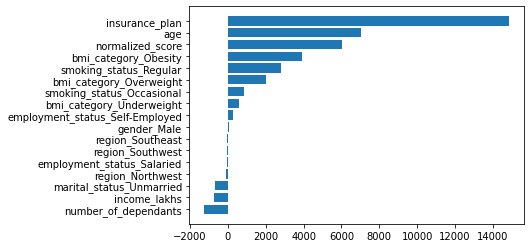

In [86]:
plt.barh(coef_df.index,coef_df['Coefficients'])

In [87]:
# SO here, the features which are highly contributing to the prediction are insurance plan and age

In [88]:
# checking the other metrics like MSE nad RMSE
from sklearn.metrics import mean_squared_error

y_pred=model_lr.predict(X_test)

mse_lr=mean_squared_error(y_test,y_pred)
rmse_lr=np.sqrt(mse_lr)

print("Linear Regression MSE :", mse_lr , "RootMSE :" , rmse_lr)

Linear Regression MSE : 2183801.881857191 RootMSE : 1477.7692248308567


# Lets check OR do same with XGBoost model instead of Linear regerresion

In [89]:
from xgboost import XGBRegressor

model_xgb=XGBRegressor()
model_xgb.fit(X_train,y_train)

train_score_xgb=model_xgb.score(X_train,y_train)

test_score_xgb=model_xgb.score(X_test,y_test)


y_pred=model_xgb.predict(X_test)

mse_xgb=mean_squared_error(y_test,y_pred)
rmse_xgb=np.sqrt(mse_xgb)

print("XGBoost MSE :", mse_xgb , "RootMSE :" , rmse_xgb)



train_score_xgb,test_score_xgb


XGBoost MSE : 95870.859375 RootMSE : 309.6301977763151


(0.9986407160758972, 0.9980074167251587)

In [90]:
#this clearly sees an improvement in RMSE and the accuracy i.e r2 score than in Linear regression.

In [91]:
# Choosing Best Model and assigning it to the variable best_model for conveinence

In [92]:
#  We have seen two models. model_lr and model_xgb , out of which model_xgb is more good in accuracy score,
# sp choosing our best model 

best_model=model_xgb    # we select this model_xgb model for rest of ages>25

# ERROR ANALYSIS 

In [93]:
#  Here we see the magnitude of vairation ( or residuals) of predicted y values by model_xgb when X_test is given, v/s actual y_test values
# to check the error percentage

y_pred=best_model.predict(X_test)
residuals=y_pred-y_test

# residuals in percentage 
residuals_pct=(y_pred-y_test)*100/y_test



In [94]:
residuals_pct

5495     0.882181
582     -1.707095
281     -2.444572
15443   -1.760811
24281    0.783396
           ...   
12305   -0.643953
2117     1.498903
23521   -0.556452
29683   -0.787814
11077    0.113079
Name: annual_premium_amount, Length: 8947, dtype: float64

Text(0.5, 0, 'residuals_pct')

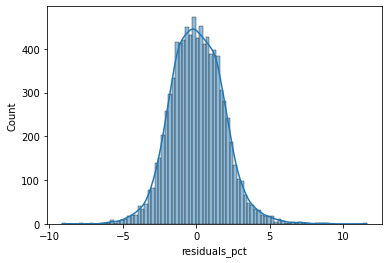

In [95]:
sns.histplot(residuals_pct , kde= True)
plt.xlabel("residuals_pct")

In [96]:
#  here the residuals_pct is just about 5 percent.

In [97]:
#  SO we have to analysis of why this is so much error percentage.  SO, how it is found , where the 
# things are going wrong

# Answer A >> visually inspect the histograms of each feature , Ideally the curvature should be same

# if nothing unusual is found then consult business team for more data like genetics, eatinghabbits, excercise or steps a day , and 4
# retrain the model with these data included

In [98]:
#  But first,lets see how many of them are more than 10 percent of errors

results_df=pd.DataFrame({

    'actual' :y_test,
    'predicted':y_pred,
    'diff':residuals,
    'diff_pct':residuals_pct
})


In [99]:
results_df

,actual,predicted,diff,diff_pct
5495,30838,31110.046875,272.046875,0.882181
582,26306,25856.931641,-449.068359,-1.707095
281,17983,17543.392578,-439.607422,-2.444572
15443,19345,19004.371094,-340.628906,-1.760811
24281,33317,33578.003906,261.003906,0.783396
...,...,...,...,...
12305,33760,33542.601562,-217.398438,-0.643953
2117,24710,25080.378906,370.378906,1.498903
23521,31709,31532.554688,-176.445312,-0.556452
29683,10787,10702.018555,-84.981445,-0.787814


In [100]:
results_df.shape

(8947, 4)

In [101]:
# making out a df having onyl those rows whos difference percentage is less than acceptable buisness error margin
#  that is 10 percent
extreme_results_threshold=10

extreme_results_df=results_df[np.abs(results_df.diff_pct)>extreme_results_threshold]

In [102]:
extreme_results_df.shape

(1, 4)

In [103]:
extreme_errors_pct=extreme_results_df.shape[0] *100 / results_df.shape[0]
extreme_errors_pct

0.011176930814798256

In [104]:
# this shiws 30percent of the records are over 10 percent error margin// which is not  acceptable

# Now we need to see which column or feature is causing such high errors
# the difference_percentage seen in results_df is made out of X test data, so we need to see those rows which contriubted to this
# errors



In [105]:
extreme_results_df.index  # this gives the indexes of extreme_results_df rows which where in consideration in , use these in Xtest

Index([8270], dtype='int64')

In [106]:
extreme_errors_df=X_test.loc[extreme_results_df.index]
extreme_errors_df.shape

(1, 17)

In [107]:
extreme_errors_df

,age,number_of_dependants,income_lakhs,insurance_plan,normalized_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
8270,0.282609,0.0,0.0,0.0,0.0,0,0,1,0,1,0,0,0,0,0,1,0


In [108]:
#  looking at the df, we will not know the problem, so we need to plot the histogram of each feature of 
# raw data X_test over the histogram of extreme_results_df , this will allow us to see the extreme_results_df data which is
# out of sync with X_test.

<Axes: xlabel='income_lakhs', ylabel='Count'>

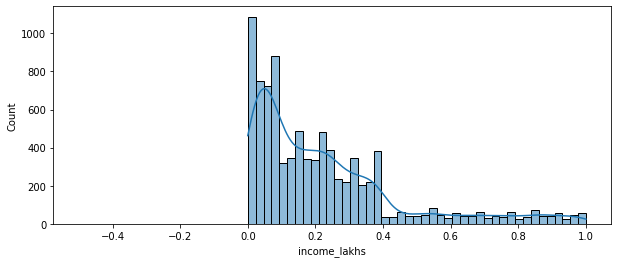

In [109]:
plt.figure(figsize=(10,4))
sns.histplot(X_test.income_lakhs,kde=True)
sns.histplot(extreme_errors_df.income_lakhs,kde=True)

In [110]:
#  the curvature of both Xtest.income and extremeerrorsdf.income is same, so we dont suspect anything 
# wrong in income column.. similarly we need to check other features as well

In [111]:
# above plot show only one feature on single chart, we need to each feature separately ploted as done below

In [112]:
X_test.columns

Index(['age', 'number_of_dependants', 'income_lakhs', 'insurance_plan',
       'normalized_score', 'gender_Male', 'region_Northwest',
       'region_Southeast', 'region_Southwest', 'marital_status_Unmarried',
       'bmi_category_Obesity', 'bmi_category_Overweight',
       'bmi_category_Underweight', 'smoking_status_Occasional',
       'smoking_status_Regular', 'employment_status_Salaried',
       'employment_status_Self-Employed'],
      dtype='object')

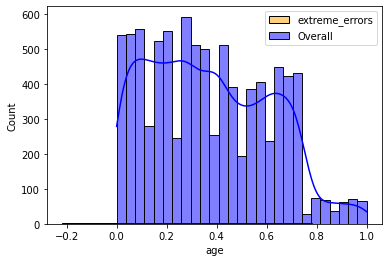

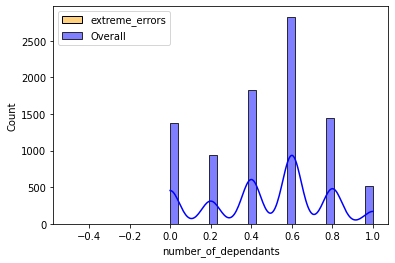

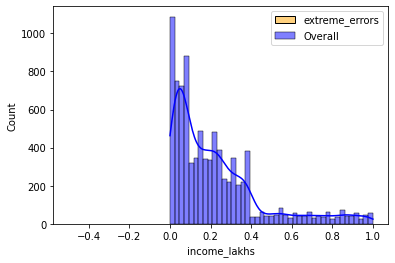

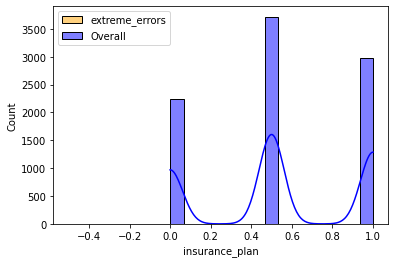

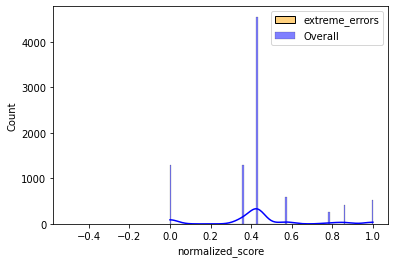

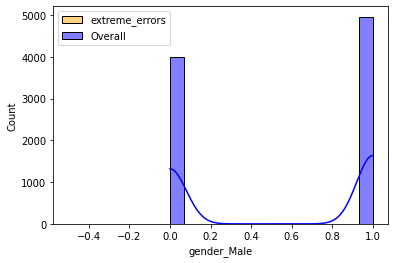

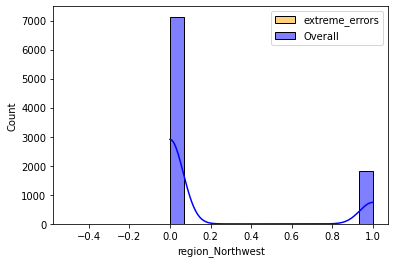

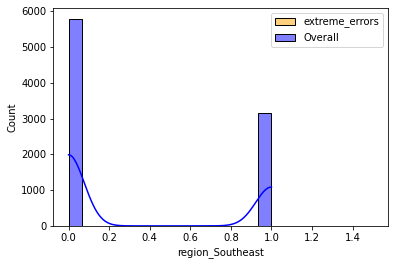

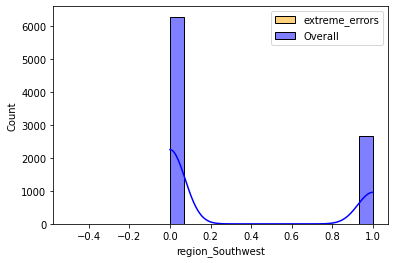

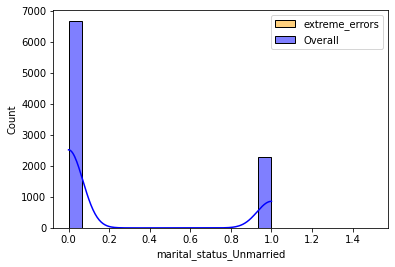

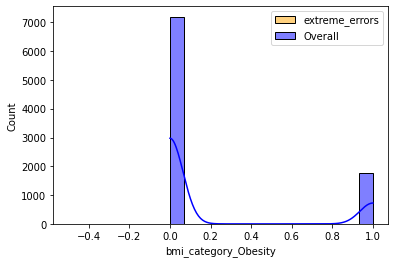

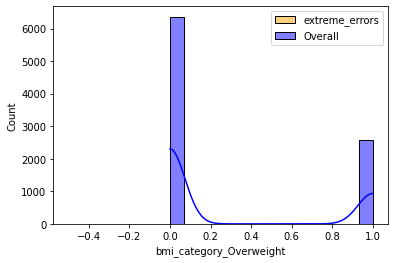

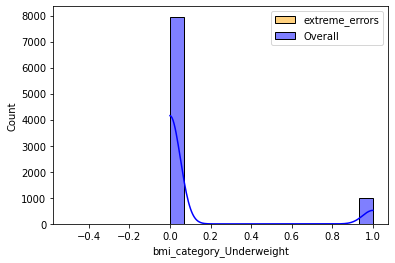

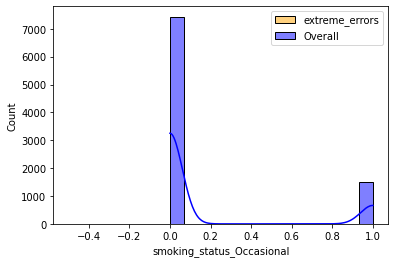

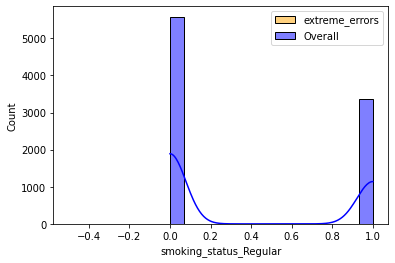

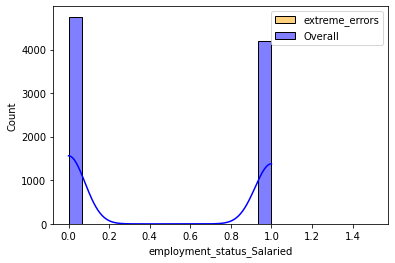

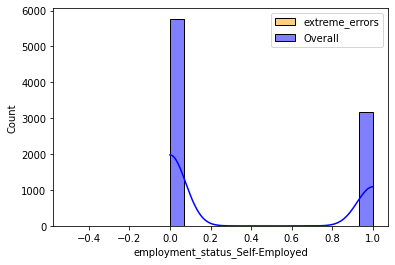

In [113]:
for feature in  X_test.columns:
    sns.histplot(extreme_errors_df[feature], kde=True , label='extreme_errors',color='orange')
    sns.histplot(X_test[feature], kde=True , color='blue' , label ='Overall' , alpha=0.5)
    plt.legend()
    plt.show()

In [114]:
extreme_errors_df['income_level']=None  #this col was removed when doing VIF , but that was used during scaling, and so we are just 
# putting that col back in extreme_errors_df , for our inverse scaling to happen back correctly.

In [115]:
# if u see the age chart , the orange curvature is more for younger ages between 0.0 to 0.2 , which could be the
# root cause for large error percentage.

# all the ages are scaled between 0 to 1 , to just to what ages have this issue, we can reverse the scaled values to actual ones
df_reversed=pd.DataFrame()
df_reversed[cols_to_scale]=scaler.inverse_transform(extreme_errors_df[cols_to_scale])
df_reversed

,age,number_of_dependants,income_level,income_lakhs,insurance_plan
0,39.0,0.0,NaN,1.0,1.0


<Axes: xlabel='age', ylabel='Count'>

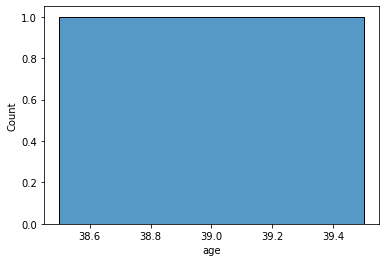

In [116]:
sns.histplot(df_reversed.age)

In [117]:
# so in above plot, we can see that, uptill 25 we have a problem from about 18 to 25/

In [118]:
df_reversed['age'].quantile(0.97)

np.float64(39.0)

In [119]:
#  the above number from quantile shows that, 97 percent of records of extreme errors are aged 25 and below.
# so, in that age group there is some issue, and it needs further attention

# Exporting out the model and scaler information as joblib files

In [121]:
from joblib import dump

dump(best_model,"artifacts/model_rest.joblib")

scaler_info={"scaler": scaler ,'cols_to_scale':cols_to_scale}

dump(scaler_info,"artifacts/scaler_rest.joblib")

['artifacts/scaler_rest.joblib']